In [5]:
# unit test
import unittest

# model and transform
import torchvision
from torchvision import transforms
from torchvision.models import shufflenet_v2_x1_0, ShuffleNet_V2_X1_0_Weights
from torchvision.models.feature_extraction import get_graph_node_names

# "helper" needs to be part of sys path
import sys
sys.path.insert(0, "helper")
sys.path.insert(0, "/helper")
sys.path.insert(0, "./helper")
sys.path.insert(0, "../helper")
print(sys.path)

device="cpu"

%load_ext autoreload
%autoreload 2

# own module
from visualisation.feature_map import *

['../helper', './helper', '/helper', 'helper', '../helper', './helper', '/helper', 'helper', '../helper', './helper', '/helper', 'helper', 'C:\\Users\\Prinzessin\\projects\\decentnet\\datasceyence\\examples', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\python39.zip', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\DLLs', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta', '', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\win32', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Prinzessin\\.ipython']
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**************************************************
example graph nodes: ['x', 'conv1.0', 'conv1.1', 'conv1.2', 'maxpool', 'stage2.0.branch1.0', 'stage2.0.branch1.1', 'stage2.0.branch1.2', 'stage2.0.branch1.3', 'stage2.0.branch1.4', 'stage2.0.branch2.0', 'stage2.0.branch2.1', 'stage2.0.branch2.2', 'stage2.0.branch2.3', 'stage2.0.branch2.4', 'stage2.0.branch2.5', 'stage2.0.branch2.6', 'stage2.0.branch2.7', 'stage2.0.cat', 'stage2.0.size']
**************************************************
Layer: Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)


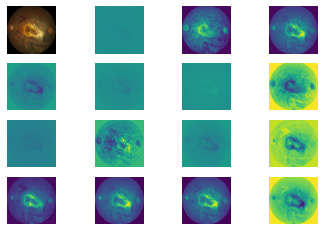

In [8]:
# get one example image
ichallenge_data = torchvision.datasets.ImageFolder('example_data')
img, label = ichallenge_data.__getitem__(1)

# tensor preparation
to_tensor = transforms.ToTensor()
img = to_tensor(img).to(device)

# model preparation
model = shufflenet_v2_x1_0(weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1).to(device)

# layer to focus on
print("*"*50)
print("example graph nodes:", get_graph_node_names(model)[0][0:20])
print("*"*50)
layer = model.conv1[0] # model.stage2[0].branch1[2] # model.fusion_layer # conv

# run feature map
dd = FeatureMap(model=model, layer=layer, device=device, iterations=1000, lr=0.1)
dd.run(img)
dd.plot()